In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
from matplotlib.pyplot import rc_context
from matplotlib import colormaps
import scipy
import scipy.stats as stats
import matplotlib.ticker as ticker

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/d

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.3 scipy==1.11.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
adata_merged = sc.read_h5ad('/vol/ExtraVol/MergedData_Glial_Neuronal_Immune_removed.h5ad')

In [4]:
adata_merged.uns['log1p']["base"] = None

In [5]:
# Create a boolean mask for all cells that come from the parasite dataset
parasite_samples = adata_merged.obs['stage'].isin(['uninfected_adult_1', 'uninfected_adult_2', 'early', 'peak', 'repair'])

# Subset the AnnData object
adata = adata_merged[parasite_samples].copy()

print(adata.obs['stage'].cat.categories)


Index(['early', 'peak', 'repair', 'uninfected_adult_1', 'uninfected_adult_2'], dtype='object')


In [36]:
adata

AnnData object with n_obs × n_vars = 38029 × 40879
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'percent.mt', 'CellName', 'doublet_finder', 'Doublet_classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

normalizing counts per cell
    finished (0:00:01)


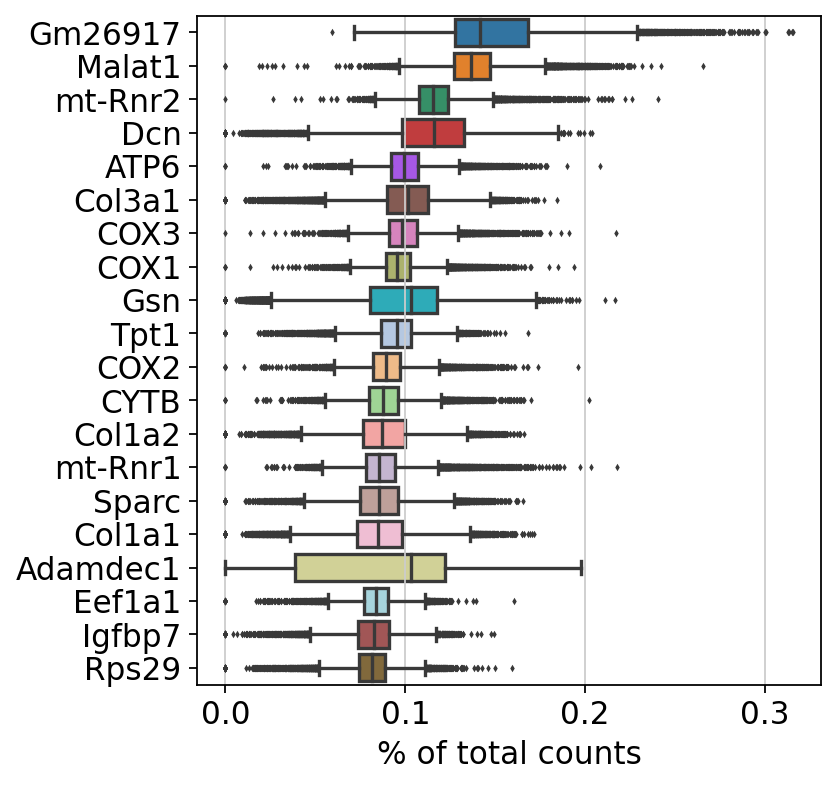

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

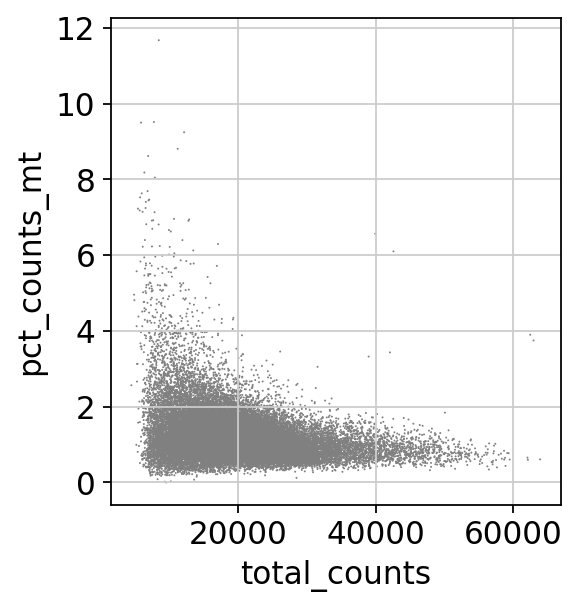

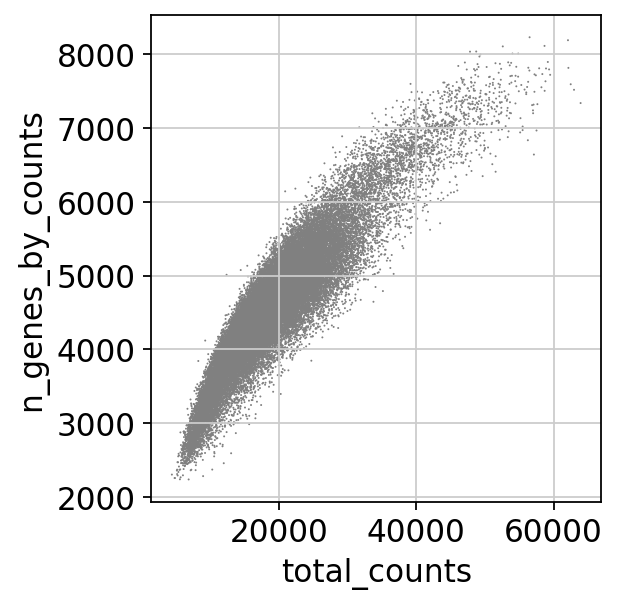

In [7]:
#Visualize QC metrics to assure consistency with the previous work
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


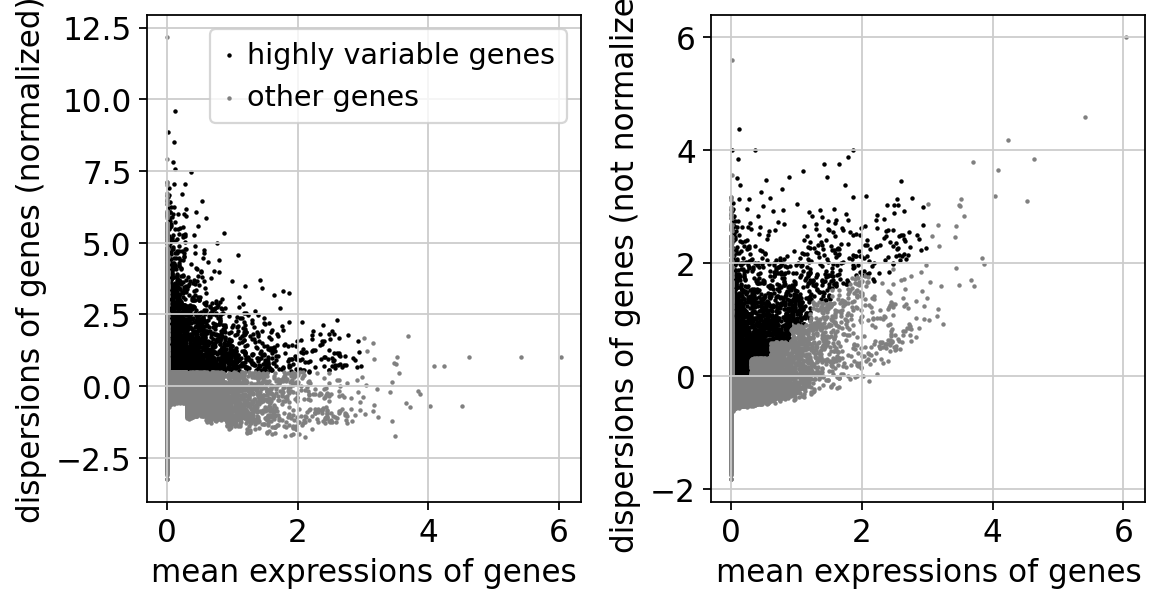

In [9]:
sc.pl.highly_variable_genes(adata)

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


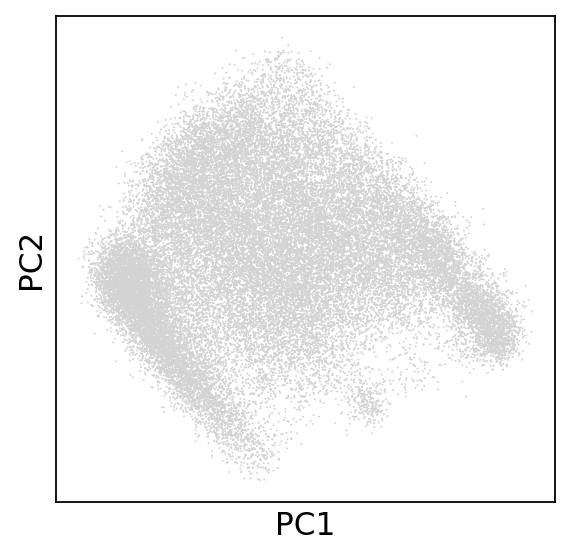

In [11]:
sc.pl.pca(adata)

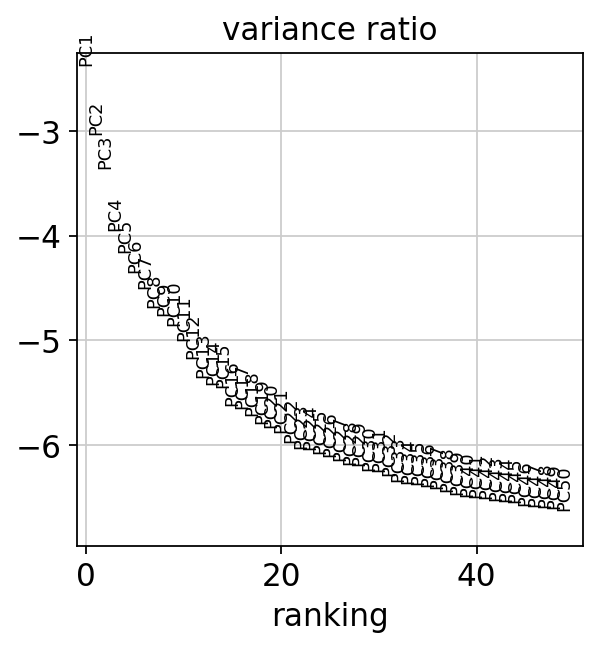

In [12]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=25)

computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)


In [14]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [15]:
sc.tl.leiden(adata, resolution=0.22)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


In [16]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga', min_dist=0.5)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


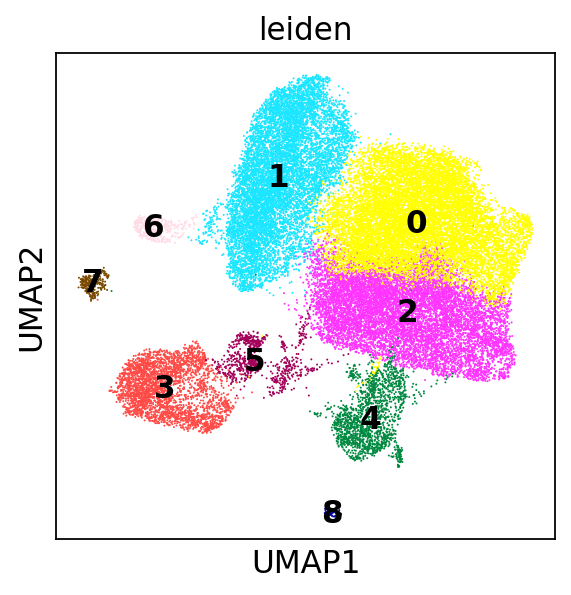

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


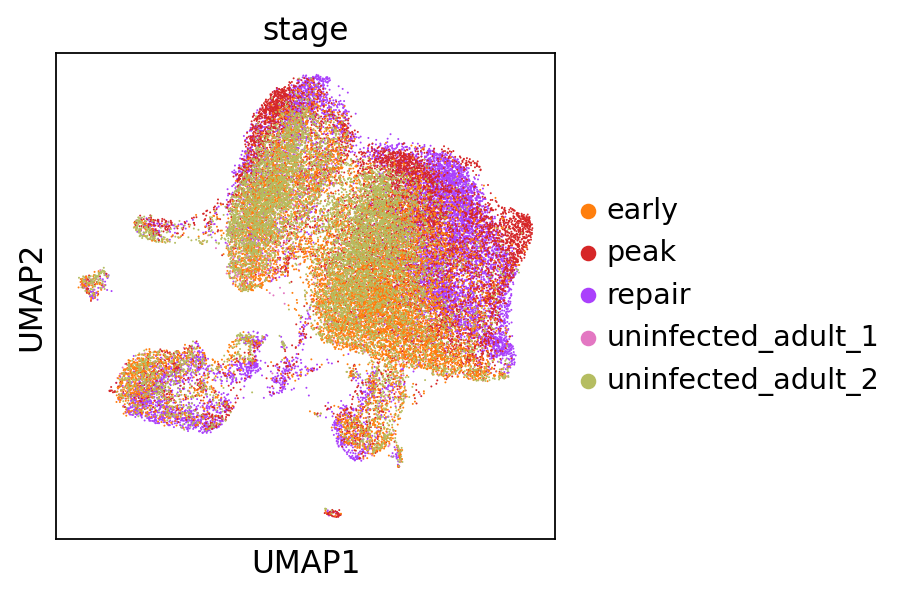

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


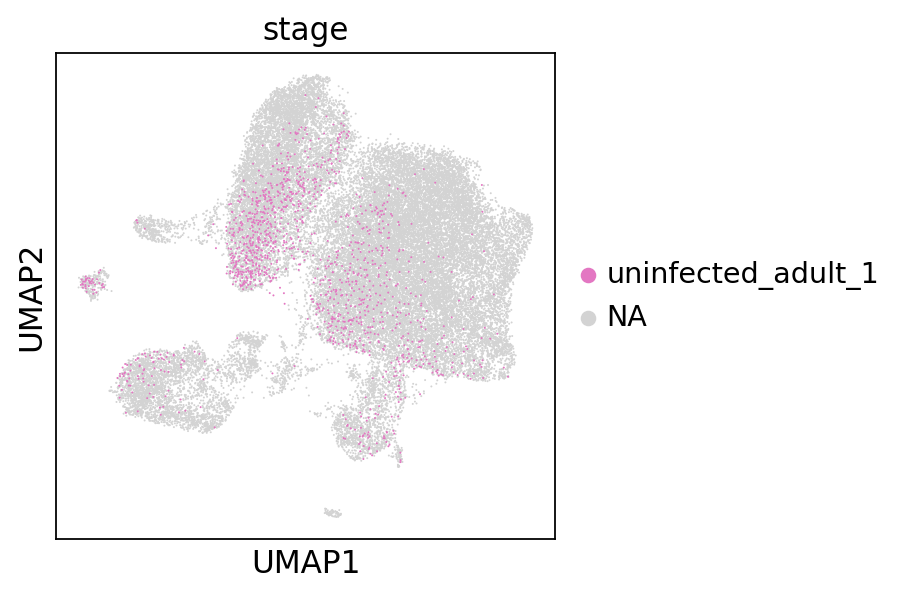

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


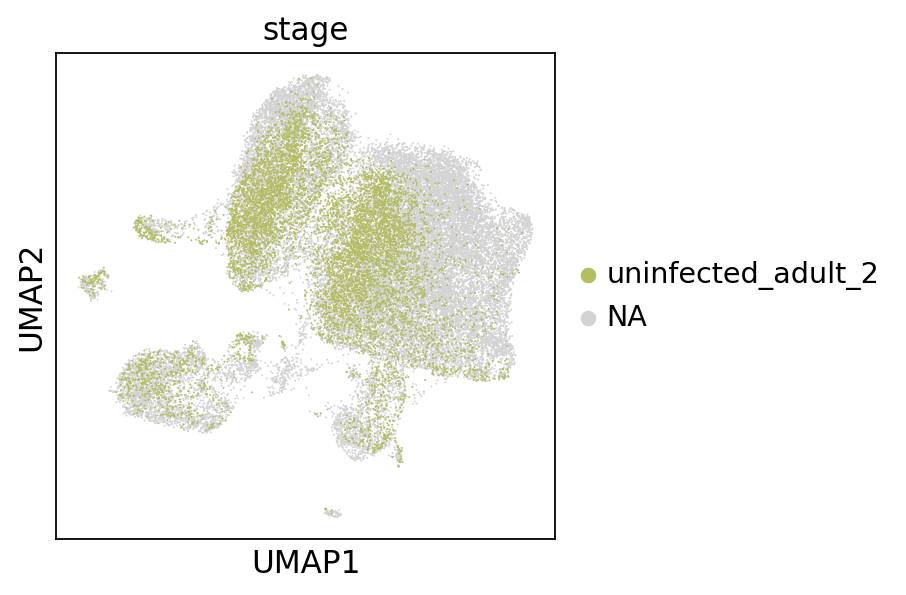

In [17]:
sc.pl.umap(adata, color = "leiden", use_raw=False, legend_loc='on data')
sc.pl.umap(adata, color = "stage", use_raw=False)
sc.pl.umap(adata, color = "stage", use_raw=False, groups = "uninfected_adult_1")
sc.pl.umap(adata, color = "stage", use_raw=False, groups = "uninfected_adult_2")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:01)


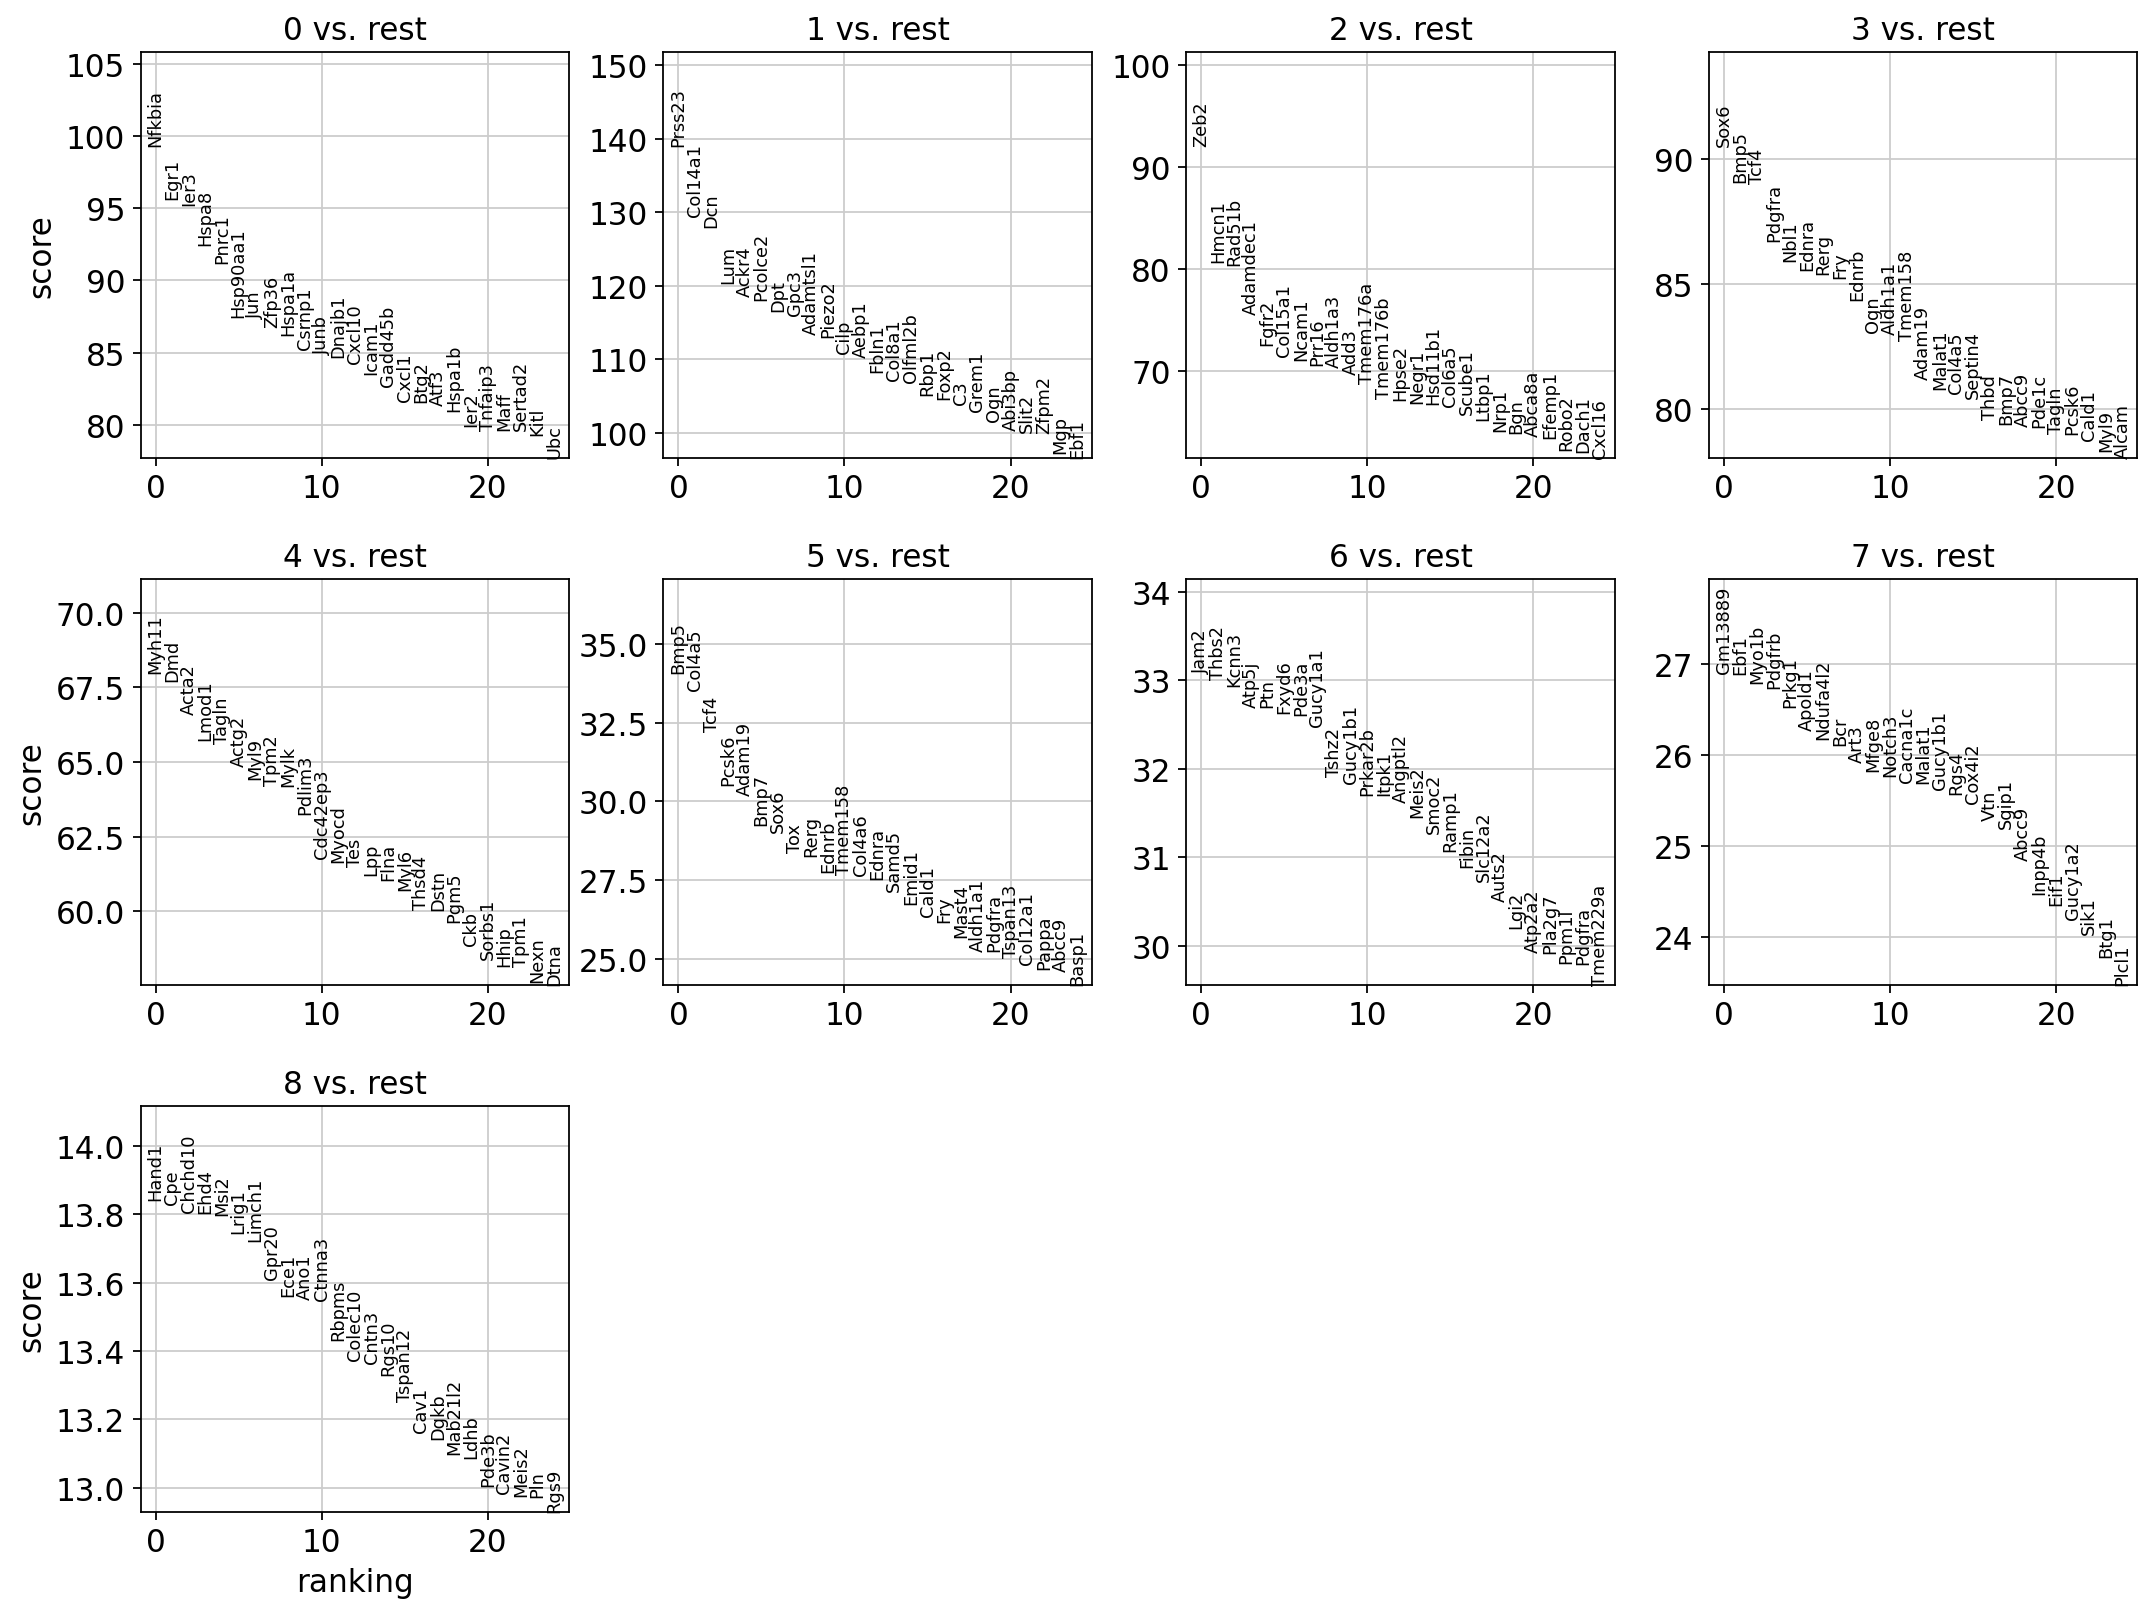

In [18]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False, pts=True, )
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:33)


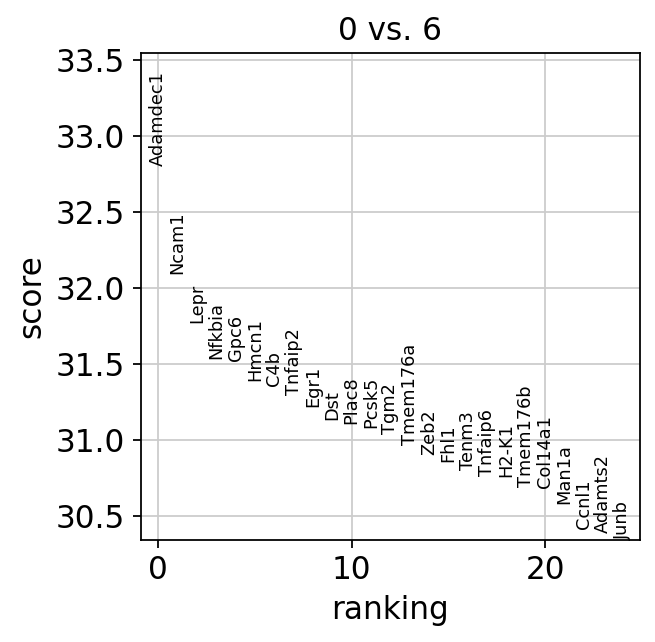

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw = False, groups = ['0'], reference = '6')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

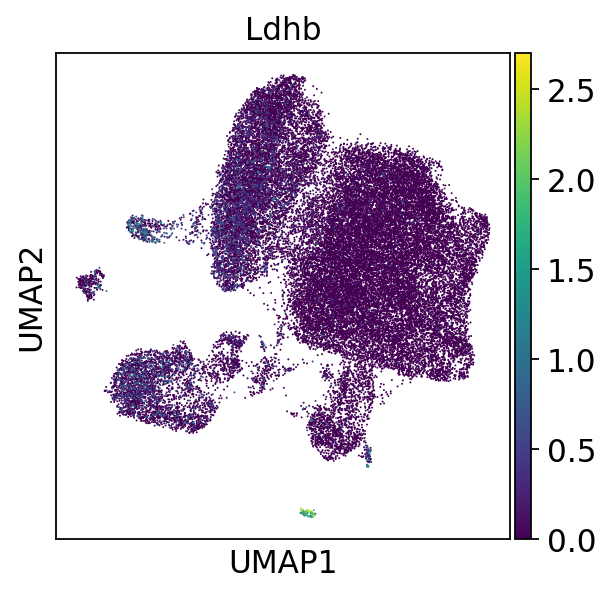

In [35]:
sc.pl.umap(adata, color = "Ldhb", use_raw=False)

In [21]:
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = ['0/FB_Adamdec1+_1', 
                                           '1/FB_Adamdec1-', 
                                           '2/FB_Adamdec1+_2', 
                                           '3/FB_Bmp5+Fbln1-', 
                                           '4/Myofibroblasts', 
                                           '5/FB_Bmp5+Fbln1+', 
                                           '6/Jam2+', 
                                           '7/Pericytes', 
                                           '8/Hand1+']

/tmp/ipykernel_51774/1633050998.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  adata.obs['leiden_anno'].cat.categories = ['0/FB_Adamdec1+_1',


In [22]:
# Retrieve the colormap
cmap = plt.get_cmap('Set3')

# Extracting the colors as hex codes
colors_hex = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

In [23]:
colors_hex

['#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#ffed6f']

In [24]:
#Replace a color manually
colors_hex[1] = '#f5e000'
colors_hex[8] = '#43bf92'

/home/ubuntu/anaconda3/envs/scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


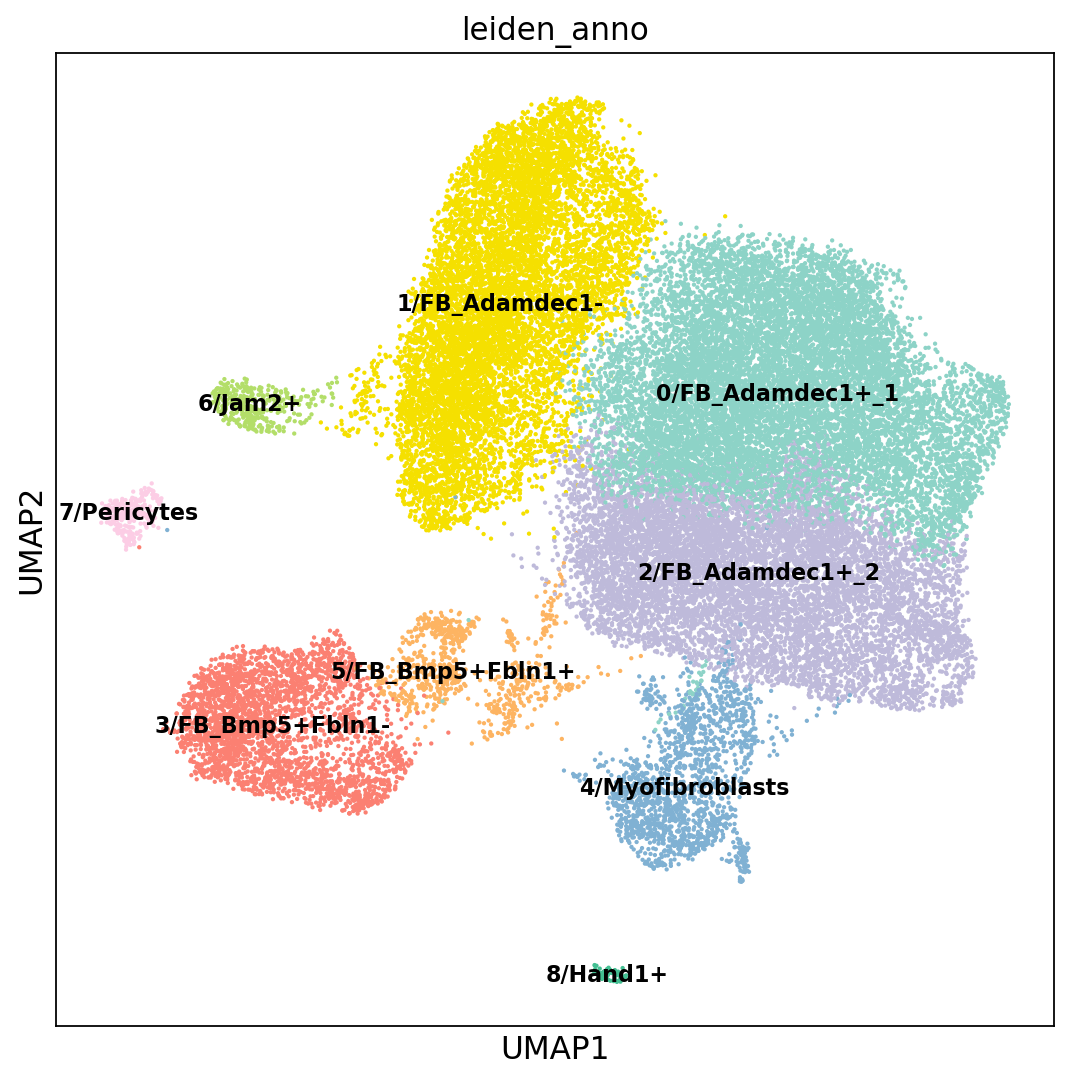

In [25]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = "leiden_anno", use_raw=False, legend_loc = "on data", legend_fontsize = 10, na_in_legend = False, palette = colors_hex, size=15)

In [26]:
adata.write_h5ad("/vol/ExtraVol/Parasite_Clustered.h5ad") 

In [27]:
adata

AnnData object with n_obs × n_vars = 38029 × 40879
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample_ID', 'stage', 'percent.mt', 'CellName', 'doublet_finder', 'Doublet_classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_anno'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'stage_colors', 'umap', 'rank_genes_groups', 'leiden_anno_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [28]:
t=adata.X
df = pd.DataFrame(data=t, index=adata.obs["CellName"], columns=adata.var_names)
df

,Gm26206,Xkr4,Gm53491,Rp1,Sox17,Gm22307,Gm37323,Gm39586,Gm46082,Gm29874,...,ND4,TrnH,TrnS2,TrnL2,ND5,ND6,TrnE,CYTB,TrnT,TrnP
CellName,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGTATCTGC-1_1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.278196,0.000000,0.359544,0.0,1.954085,0.359544,0.000000,3.643100,0.359544,0.000000
AAACCCACATGACTGT-1_1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.574454,0.000000,0.339424,0.0,2.249913,0.000000,0.000000,3.015468,0.000000,0.000000
AAAGGATTCCAAACCA-1_1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.111631,0.553838,0.000000,0.0,1.821226,1.169306,0.000000,3.513228,0.000000,0.908193
AAAGGGCAGTCTACCA-1_1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.211056,0.000000,0.000000,0.0,1.519686,0.000000,0.000000,3.518454,0.000000,0.000000
AAAGGTACACCACATA-1_1,0.0,1.664111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.096170,0.305091,0.305091,0.0,1.664111,0.538536,0.000000,2.396889,0.000000,0.305091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTAGTGATA-1_8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.656632,0.000000,0.000000,0.0,1.859376,0.000000,0.000000,2.947894,0.000000,0.000000
TTTGTTGTCACATCAG-1_8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.168210,0.000000,0.000000,0.0,1.121527,0.000000,0.000000,3.382902,0.000000,0.000000
TTTGTTGTCAGGACGA-1_8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.990399,0.000000,0.000000,0.0,1.507426,0.000000,0.000000,3.537864,0.000000,0.000000


In [29]:
t=adata.layers["raw_counts"]
df = pd.DataFrame(data=t, index=adata.obs["CellName"], columns=adata.var_names)
df
df.to_csv('/vol/ExtraVol/Parasite_Clustered.csv')

In [30]:
adata.obs.to_csv('/vol/ExtraVol/Parasite_Clustered_Metadata.csv')